
### Laplace's Equation for 2-D $$\frac{\partial^2 V}{\partial x^2}+\frac{\partial^2 V}{\partial y^2} = 0$$

Modules to import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d

%matplotlib inline

#### Question No. 1

\begin{align*}
V(0,y) &= 0.0, &\text{ for }0<y<1 \\
V(1,y) &= y, &\text{ for } 0<y<1 \\
V(x,0) &= 0.0, &\text{ for } 0<x<1\\
V(x,1) &= x, &\text{ for } 0<x<1\\
\end{align*}

Creation of Meshgrid

In [2]:
margin = 10e-12
error = margin+1

x = np.arange(0,1,0.05)
y = np.arange(0,1,0.05)
X, Y =np.meshgrid(x,y)

n = len(x)
V = np.zeros((n,n))
U = X*Y

Implementation of Boundary conditions

In [3]:
def boundary(S: list)->float:       #boundary conditions
    S[0,:] = 0      #top
    S[-1,:] = x     #bottom
    S[:,0] = 0      #left          
    S[:,-1] = y     #right

    return S

boundary(V)
i = 0

Applying the Finite Difference Method

In [4]:
while error>margin:
    initial=V.copy()
    for k in range(1,n-1):
        for j in range(1,n-1):
            V[k][j]=(0.25)*(initial[k-1][j]+initial[k+1][j]+initial[k][j-1]+initial[k][j+1])
    error=np.sum(np.abs(V-initial))
    i = i+1
print("Iteration number: ",i)    


Iteration number:  1826


Plotting of the Harmonic Function

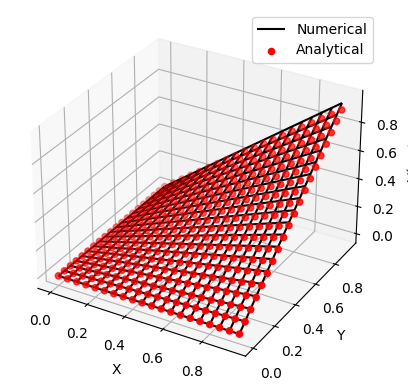

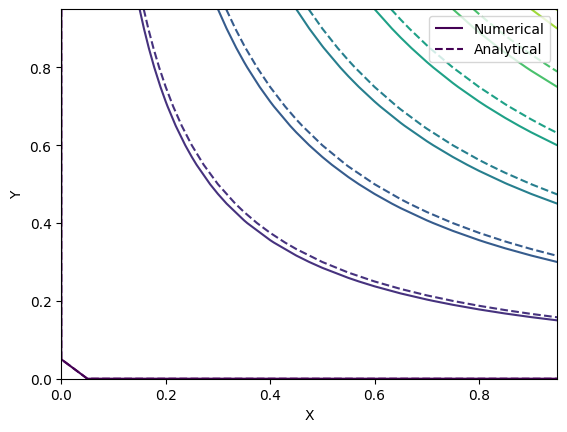

In [5]:
fig = plt.figure(1)
ax = plt.axes(projection = '3d')
ax.set_xlabel(r"X")
ax.set_ylabel(r"Y")
ax.set_zlabel(r"V(x,y)")
ax.plot_wireframe(X,Y,V, color ='k', label = 'Numerical')
ax.scatter3D(X,Y,U, color ='r', label = 'Analytical')
#plt.savefig('laplace_1.1.png')
plt.legend()

fig = plt.figure(2)
plt.xlabel(r"X")
plt.ylabel(r"Y")
p1 = plt.contour(X,Y,V)
p2 = plt.contour(X,Y,U, linestyles = "dashed")
h1,l1 = p1.legend_elements()
h2,l1 = p2.legend_elements()
plt.legend([h1[0], h2[0]], ['Numerical', 'Analytical'])
#plt.savefig('laplace_1.2.png')
plt.show()


#### Question No: 2

\begin{align*}
V(0,y) &= \frac{1}{1+y^2}, &\text{ for }0<y<1 \\
V(1,y) &= \frac{1}{4+y^2}, &\text{ for }0<y<1 \\ 
V(x,0) &= 0.0, &\text{ for }0<x<1 \\
V(x,1) &= \frac{1}{(1+x)^2 + 1}, &\text{ for }0<x<1
\end{align*}

Creating the Meshgrid

In [6]:
margin = 10e-4
error = 1

x = np.arange(0,1,0.05)
y = np.arange(0,1,0.05)
X, Y =np.meshgrid(x,y)
n = len(x)

V = np.zeros((n,n))


Implementing the Boundary Conditions

In [7]:
def boundary(S:list,x:list,y:list)->list:
    S[0,:]=0 #bottom
    S[-1,:]=1/((1+x)**2+1) #top
    S[:,0]=y/(1+y**2) #left
    S[:,-1]=y/(4+y**2)#right

    return S

boundary(V,x,y)
U=Y/((1+X)**2+(Y)**2)

Applying the Finite Difference Method

In [8]:
i = 0
while error>margin:
    initial=V.copy()
    for k in range(1,n-1):
        for j in range(1,n-1):
            V[k][j]=(0.25)*(initial[k-1][j]+initial[k+1][j]+initial[k][j-1]+initial[k][j+1])
    error=np.sum(np.abs(V-initial))
    i = i+1
print("Iteration number: ",i)

Iteration number:  471


Plotting of the Harmonic Function

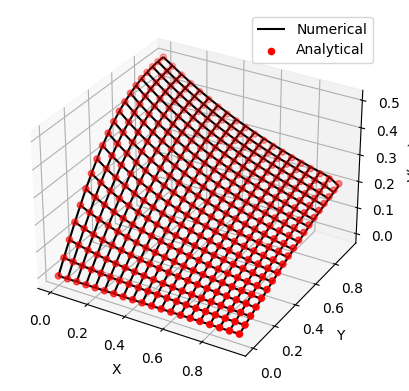

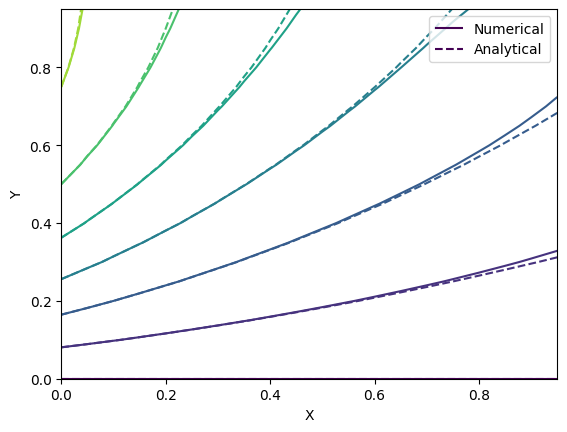

In [9]:
fig = plt.figure(1)
ax = plt.axes(projection = '3d')
ax.set_xlabel(r"X")
ax.set_ylabel(r"Y")
ax.set_zlabel(r"V(x,y)")
ax.plot_wireframe(X,Y,V, color ='k', label = 'Numerical')
ax.scatter3D(X,Y,U, color ='r', label = 'Analytical')
plt.legend()
#plt.savefig('laplace2.1.png')


fig = plt.figure(2)
plt.xlabel(r"X")
plt.ylabel(r"Y")
p1 = plt.contour(X,Y,V)
p2 = plt.contour(X,Y,U, linestyles = "dashed")
h1,l1 = p1.legend_elements()
h2,l1 = p2.legend_elements()
plt.legend([h1[0], h2[0]], ['Numerical', 'Analytical'])
#plt.savefig('laplace2.2.png')
plt.show()